# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
lat = []
lng = []
humid = []
cloud = []
wind = []
Country = []
Date = []
Max_temp = []
city_name = []
query_url = f"{url}appid={api_key}&units={units}&q="
print("Beginning Data Retrieval")
print("--------------------------------")

count = 1
for city in cities:
    response = requests.get(query_url + city).json()
    
    print("Processing Record " + str(count) + " | " + city)
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Max_temp.append(response['main']['temp_max'])
        city_name.append(response['name'])
        count = count + 1
    except KeyError:
        print('City not found.  Skipping...')
        

Beginning Data Retrieval
--------------------------------
Processing Record 1 | avarua
Processing Record 2 | new norfolk
Processing Record 3 | tambura
City not found.  Skipping...
Processing Record 3 | heishan
Processing Record 4 | bredasdorp
Processing Record 5 | east london
Processing Record 6 | waihi beach
Processing Record 7 | taolanaro
City not found.  Skipping...
Processing Record 7 | tuktoyaktuk
Processing Record 8 | hilo
Processing Record 9 | kholmogory
Processing Record 10 | mar del plata
Processing Record 11 | jamestown
Processing Record 12 | ushuaia
Processing Record 13 | ilulissat
Processing Record 14 | fortuna
Processing Record 15 | kavaratti
Processing Record 16 | puerto ayora
Processing Record 17 | maine-soroa
Processing Record 18 | punta arenas
Processing Record 19 | sisimiut
Processing Record 20 | port alfred
Processing Record 21 | araouane
Processing Record 22 | thompson
Processing Record 23 | batagay-alyta
Processing Record 24 | bethel
Processing Record 25 | atuona
P

Processing Record 200 | uribia
Processing Record 201 | college
Processing Record 202 | broome
Processing Record 203 | goya
Processing Record 204 | raudeberg
Processing Record 205 | baishishan
Processing Record 206 | mehamn
Processing Record 207 | biltine
Processing Record 208 | nouadhibou
Processing Record 209 | lebu
Processing Record 210 | grand centre
City not found.  Skipping...
Processing Record 210 | grand gaube
Processing Record 211 | kununurra
Processing Record 212 | chimbote
Processing Record 213 | tiarei
Processing Record 214 | sola
Processing Record 215 | banda aceh
Processing Record 216 | havelock
Processing Record 217 | glenwood springs
Processing Record 218 | riyadh
Processing Record 219 | visakhapatnam
City not found.  Skipping...
Processing Record 219 | vavozh
Processing Record 220 | dubti
Processing Record 221 | solovetskiy
City not found.  Skipping...
Processing Record 221 | vanimo
Processing Record 222 | igarka
Processing Record 223 | faanui
Processing Record 224 | ey

Processing Record 404 | puri
Processing Record 405 | asht
City not found.  Skipping...
Processing Record 405 | pangnirtung
Processing Record 406 | ayagoz
Processing Record 407 | samusu
City not found.  Skipping...
Processing Record 407 | inverell
Processing Record 408 | banjar
Processing Record 409 | arraial do cabo
Processing Record 410 | hefei
Processing Record 411 | ixtapa
Processing Record 412 | mullaitivu
City not found.  Skipping...
Processing Record 412 | phayakkhaphum phisai
Processing Record 413 | lucapa
Processing Record 414 | luwuk
Processing Record 415 | nova ushytsya
Processing Record 416 | portland
Processing Record 417 | ballina
Processing Record 418 | ust-barguzin
Processing Record 419 | ostrovnoy
Processing Record 420 | antissa
City not found.  Skipping...
Processing Record 420 | susanville
Processing Record 421 | port augusta
Processing Record 422 | korla
City not found.  Skipping...
Processing Record 422 | skagastrond
City not found.  Skipping...
Processing Record 42

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
weather_data = {"City": city_name, "Country": Country, "Lat": lat, "Lng": lng, "Max Temp": Max_temp, "Humidity": humid, "Cloudiness": cloud, "Wind Speed":wind, "Raw Date": pd.to_datetime(Date, unit='s')}
weather_data = pd.DataFrame(weather_data)
weather_data ["Converted Date"] = pd.to_datetime(weather_data['Raw Date']).dt.strftime('%m/%d/%Y')
export_csv = weather_data.to_csv (output_data_file, index = None, header=True)

In [49]:
weather_data.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Raw Date,Converted Date
0,Avarua,CK,-21.21,-159.78,86.00,79,8,6.93,2019-03-18 20:30:00,03/18/2019
1,New Norfolk,AU,-42.78,147.06,55.99,87,75,8.05,2019-03-18 21:07:21,03/18/2019
2,Heishan,CN,41.69,122.12,45.33,67,0,11.16,2019-03-18 21:14:02,03/18/2019
3,Bredasdorp,ZA,-34.53,20.04,69.80,88,76,9.17,2019-03-18 21:00:25,03/18/2019
4,East London,ZA,-33.02,27.91,76.11,97,76,17.20,2019-03-18 21:09:54,03/18/2019


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

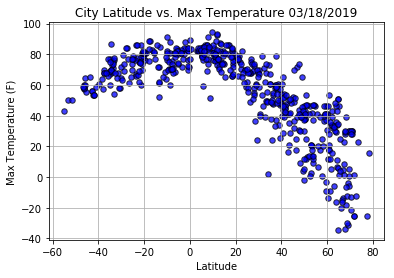

In [61]:
title_date = weather_data['Converted Date'].iloc[0]
plt.scatter(weather_data ['Lat'], weather_data ['Max Temp'], marker="o", facecolors="blue", edgecolors="black", s= 30, alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Max Temperature " + title_date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig(os.path.join("images","lat_temp.png"))
plt.show()

#### Latitude vs. Humidity Plot

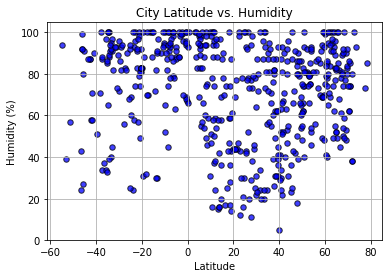

In [62]:
plt.scatter(weather_data ['Lat'], weather_data ['Humidity'], marker="o", facecolors="blue", edgecolors="black", s= 30, alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Humidity " + title_date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(os.path.join("images","lat_humid.png"))
plt.show()

#### Latitude vs. Cloudiness Plot

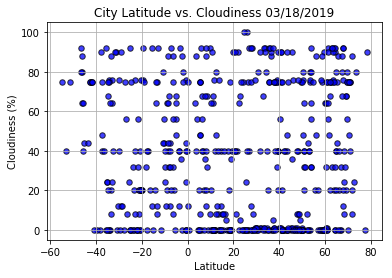

In [66]:
plt.scatter(weather_data ['Lat'], weather_data ['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", s= 30, alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Cloudiness " + title_date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(os.path.join("images","lat_cloud.png"))
plt.show()

#### Latitude vs. Wind Speed Plot

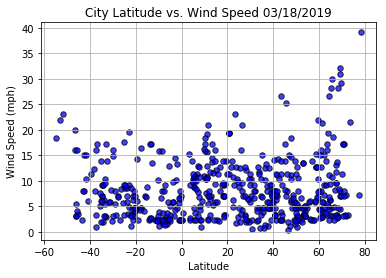

In [67]:
plt.scatter(weather_data ['Lat'], weather_data ['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", s= 30, alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Wind Speed " + title_date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig(os.path.join("images","lat_wind.png"))
plt.show()